In [1]:
from cells_simulation import *

In [21]:
    parameter_set = {   "mean_lambda": 0.01, 
                        "gamma_lambda": 0.1,
                        "var_lambda": 1e-7,
                        "mean_lambda2": 0., 
                        "gamma_lambda2": 0.0001,
                        "var_lambda2": 1e-8}

In [22]:
def norm_corr(a, b):
    return (np.mean(a*b) - np.mean(a)*np.mean(b))/(np.std(a)*np.std(b))

def auto_corr(a, taumax, dt=1.):
    auto_corrs = [norm_corr(a, a)]
    for tau in np.arange(1,taumax):
        ac = norm_corr(a[tau:], a[:-tau])
        auto_corrs.append(ac)
    time = [t*dt for t in range(len(auto_corrs))]
    return time, auto_corrs

def linear(x, a, b):
    return a*np.array(x) + b

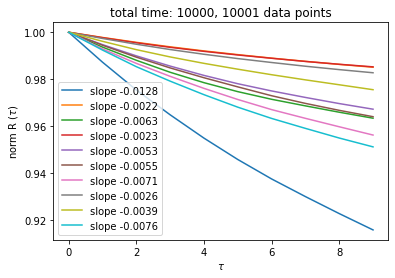

In [23]:
tot_t = 1e3
for tot_t in [1e4]:
    for i in range(10):
        lt = [parameter_set['mean_lambda']]
        lt2 = [parameter_set['mean_lambda2']]
        
        dt = 1
        for i in range(int(tot_t/dt)):
            lambda_ou = single_ou_step(dt,  parameter_set['mean_lambda'], 
                                    parameter_set['gamma_lambda'], 
                                    parameter_set['var_lambda'], 
                                    lt[-1]) 
            lambda_ou2 = single_ou_step(dt,  parameter_set['mean_lambda2'], 
                                    parameter_set['gamma_lambda2'], 
                                    parameter_set['var_lambda2'], 
                                    lt2[-1]) 

            lt.append(lambda_ou)
            lt2.append(lambda_ou2)

        lt_tot = np.array(lt) + np.array(lt2)
        lt_tot = np.array(lt_tot)[::int(1/dt)]

        t, a = auto_corr(lt_tot, 10, dt=1)
        slope = (a[0]-a[1])/(t[0]-t[1]) 
        plt.plot(t,a, label="slope {:.4f}".format(slope))
        plt.xlabel(r"$\tau$")
        plt.ylabel(r"norm R ($\tau$)")
        plt.title("total time: {:.0f}, {:d} data points".format(tot_t, len(lt)))
        plt.legend()
    plt.show()


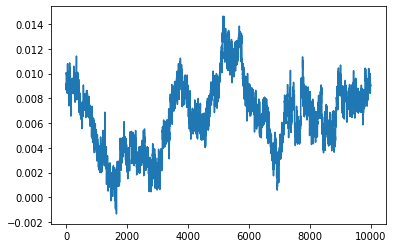

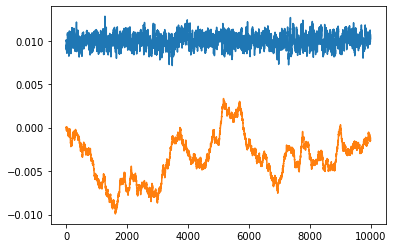

In [24]:
plt.plot(lt_tot)
plt.show()
plt.plot(lt)
plt.plot(lt2)
